In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
import requests
import zipfile
from pathlib import Path

In [3]:
from PIL import Image
from pathlib import Path
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import glob

random.seed(42)
image_path = Path("/kaggle/input/medical-image-dataset-brain-tumor-detection/")
image_path = Path("/kaggle/input/brain-tumor-mri-dataset")

train_data_path =(image_path/"Training")
test_data_path = (image_path/"Testing")

train_path_list = list(train_data_path.glob("*/*.jpg"))
test_path_list = list(test_data_path.glob("*/*.jpg"))
print(len(train_path_list))

5712


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [6]:
device = 'cuda'  if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [7]:
data_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    #transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [8]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_data_path,
                                  transform= data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_data_path,
                                 transform = data_transform
                                 )


In [9]:

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 5712
    Root location: /kaggle/input/brain-tumor-mri-dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1311
    Root location: /kaggle/input/brain-tumor-mri-dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [10]:
class_names  = train_data.classes
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [11]:
class_dict = train_data.class_to_idx
class_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

Text(0.5, 1.0, 'glioma')

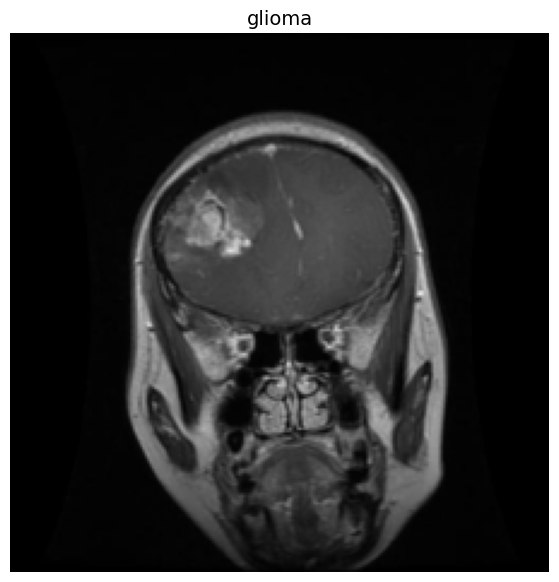

In [12]:
img, label = train_data[0][0], train_data[0][1]
img_permute = img#img.permute(1,2,0)

plt.figure(figsize=(12,7))
#plt.imshow(img.permute(1,2,0))
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.title(class_names[label], fontsize = 14)



In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b08f8ec1c10>,
 <torch.utils.data.dataloader.DataLoader at 0x7b08f8e8d450>)

In [14]:
img,label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Lable shape: {label.shape}")

Image Shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Lable shape: torch.Size([32])


In [15]:
from typing import List
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes : List[str] = None,
                          n: int = 10,
                          display_shape: bool = None,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")
  if seed:
    random.seed(seed)
  random_sample_idx  = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize = (16,8))

  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i +1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f"{classes[targ_label]}"
      if display_shape:
        title = title + f"\n shape: {targ_image_adjust.shape}"

      plt.title(title)

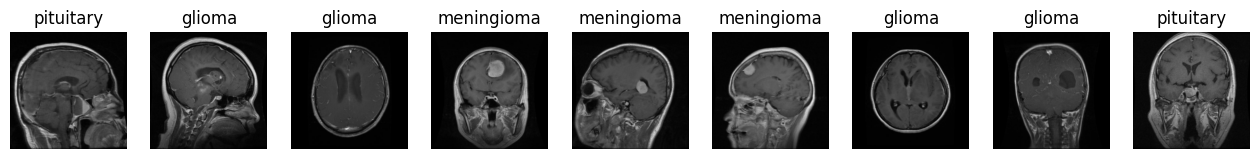

In [16]:
display_random_images(train_data,
                      n=9,
                      classes = class_names,
                      seed = None)

In [17]:
# from torchvision import transforms

# train_transforms = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31),
#     transforms.ToTensor()
# ])

# test_transforms = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor()
# ])

In [18]:
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer
               ):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    #print(f"[DEBUG] Batch {batch} labels:", y[:10].cpu().tolist())  # ← Add this line

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader) *100
  train_acc = train_acc/ len(dataloader) * 100

  return train_loss, train_acc

In [19]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            #print(f"[Test DEBUG] Batch {batch} labels:", y[:10].cpu().tolist())  # ← Add this line

            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader) *100
    test_acc = test_acc / len(dataloader) *100
    return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm
from torch import nn
def train(model: torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
          ):
  results = {"train_loss" : [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [22]:
import torchvision.models as models



torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20
resnet18 = models.resnet18(pretrained=True)

resnet18.fc = nn.Linear(resnet18.fc.in_features, len(train_data.classes))


# Recreate an instance of TinyVGG
model_0 = resnet18.to(device)
# BrainTumorModelV1(input_shape=3, # number of color channels (3 for RGB)
#                   hidden_units=40,
#                   output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 252.4810 | train_acc: 48.4811 | test_loss: 113.4625 | test_acc: 52.1882
Epoch: 2 | train_loss: 74.8600 | train_acc: 70.7053 | test_loss: 91.3967 | test_acc: 65.7627
Epoch: 3 | train_loss: 63.6258 | train_acc: 75.1222 | test_loss: 113.7256 | test_acc: 64.5137
Epoch: 4 | train_loss: 56.8428 | train_acc: 77.8457 | test_loss: 70.8357 | test_acc: 67.9804
Epoch: 5 | train_loss: 53.5956 | train_acc: 78.7884 | test_loss: 73.9489 | test_acc: 67.6264
Epoch: 6 | train_loss: 47.9333 | train_acc: 81.3198 | test_loss: 64.6438 | test_acc: 75.4352
Epoch: 7 | train_loss: 41.9882 | train_acc: 84.4274 | test_loss: 114.6269 | test_acc: 57.7744
Epoch: 8 | train_loss: 38.3528 | train_acc: 85.6669 | test_loss: 49.4780 | test_acc: 82.1573
Epoch: 9 | train_loss: 35.5401 | train_acc: 86.9937 | test_loss: 53.2200 | test_acc: 79.4207
Epoch: 10 | train_loss: 30.7467 | train_acc: 88.6522 | test_loss: 53.3634 | test_acc: 81.9360
Epoch: 11 | train_loss: 27.8454 | train_acc: 90.0838 | test_loss:

In [24]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(resnet18, input_size=[1,3, 224,224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

In [25]:
torch.save(model_0,"brainTumorMRI_weights1.pth")

In [26]:
model_0_results["train_loss"]

[tensor(252.4810, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(74.8600, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(63.6258, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(56.8428, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(53.5956, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(47.9333, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(41.9882, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(38.3528, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(35.5401, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(30.7467, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(27.8454, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(25.1466, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(20.7283, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(23.1914, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(16.7833, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(14.8843, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(16.0173, device='cuda:0', grad_fn=<MulBackward0

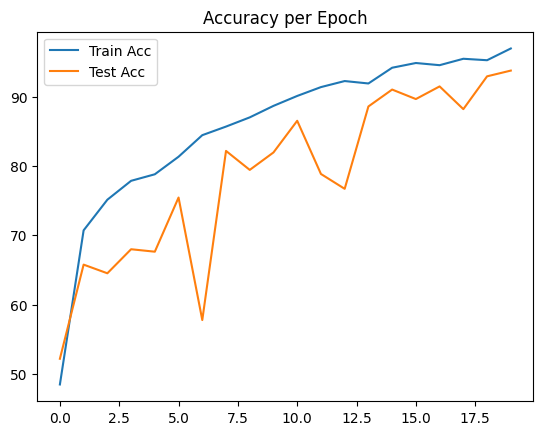

In [27]:
import matplotlib.pyplot as plt
train_acc = [t for t in model_0_results["train_acc"]]
test_acc = [t for t in model_0_results["test_acc"]]
plt.plot(np.array(train_acc), label='Train Acc')
plt.plot(np.array(test_acc), label='Test Acc')
plt.legend(); plt.title('Accuracy per Epoch')
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_0.eval()
y_true =[]
y_pred =[]

#model_0.inference_mode()

with torch.no_grad():
  for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device)
    outputs = model_0(images)
    _,pred = torch.max(outputs,1)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(pred.cpu().numpy())


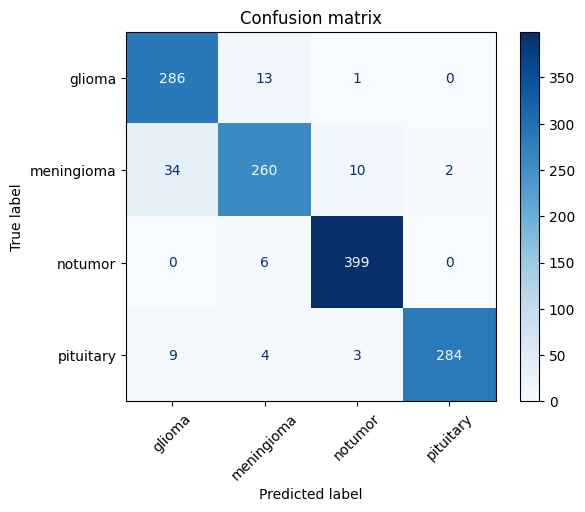

In [29]:
class_names = test_data.classes

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues',xticks_rotation=45)
plt.title("Confusion matrix")
plt.show()


**To visualize step by step using Grad-CAM**

In [30]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00:00:0100:01
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=23e57f3a3e533830d6145c5b5eef307f1ada7b60cf629b2

In [31]:
model = model_0

In [34]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Use last conv layer of ResNet18
target_layers = [model_0.layer4[-1]]


In [47]:
# Get index of "meningioma" class
meningioma_idx = test_data.class_to_idx["meningioma"]

# Loop through test dataset and pick one
counter = 0
for img, label in test_data:
    if label == meningioma_idx:
        input_image = img
        counter +=1
        if counter == 10:
            break


In [48]:
# Convert to numpy image for visualization
rgb_image = input_image.permute(1, 2, 0).numpy()
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())  # Normalize to [0, 1]

# Create batch
input_tensor = input_image.unsqueeze(0).to(device)


In [49]:
cam = GradCAM(model=model_0, target_layers=target_layers)#, use_cuda=True)
targets = [ClassifierOutputTarget(meningioma_idx)]  # focus on meningioma class

grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]  # shape: (H, W)
visualization = show_cam_on_image(rgb_image, grayscale_cam, use_rgb=True)


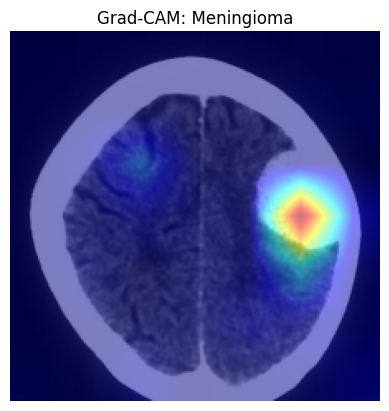

In [50]:
plt.imshow(visualization)
plt.axis('off')
plt.title("Grad-CAM: Meningioma")
plt.show()

In [51]:
plt.imsave("gradcam_meningioma.png", visualization)


# END RESULT: USING RESENET18 as backbone, we are able to get pretty good accuracy of ~93-96%

Epoch: 20 | train_loss: 8.6331 | train_acc: 96.9274 | test_loss: 22.8798 | test_acc: 93.7402